# Case : Old cars dataset analysis

In [1]:
# Dataset link : https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset/code
# Date : 01/06/2023 to 07/06/2023

# Project Main Objective 

**Analyze the old car dataset and find intresting things related to the old cars**.



# Project steps are 
1. Data Collectiion
2. Data Understanding
3. Data Preprocessing ( Handling Missing values, Cleaning the messsy data)
4. Exploratory Data Analysis
    a) Handling missing values
    b) Cleaning the data
4. Report/Conclusion 

In [55]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Collecting

In [56]:
car = pd.read_csv("./Automobile.csv")

# cloning the data for data lose
df = car.copy()

## 2. Understanding of Data

In [57]:
# print the first 5 row of dataframe
df.head(5)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


### About the Dataset

**mpg** : MPG stands for miles per gallon and is a measure of a car's fuel efficiency.  The higher the MPG, the more fuel efficient the car is.

**displacement**: engine displacement refers to how much air it can move. The more air your engine can take in at once, the more powerfully your vehicle can perform.

**horsepower**: Horsepower in cars refers to the power produced by an engine, The higher the horsepower, the more power will be produced and the faster the car will go.

**acceleration**: Acceleration can also refer to the rate at which a car or other vehicle can go faster or the rate at which the speed of an object increases. 

In [58]:
df.shape

(398, 9)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [60]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


`Insight`

- From the dataset, **Row** and **Columns** of dataframe is (**398**, **9**) respectively. 
- There are **2** Categorical variable and **7** Numerical variable.
- Only **one column have missing value**.

## 3. Data Preprocessing

#### * Handing missing value 

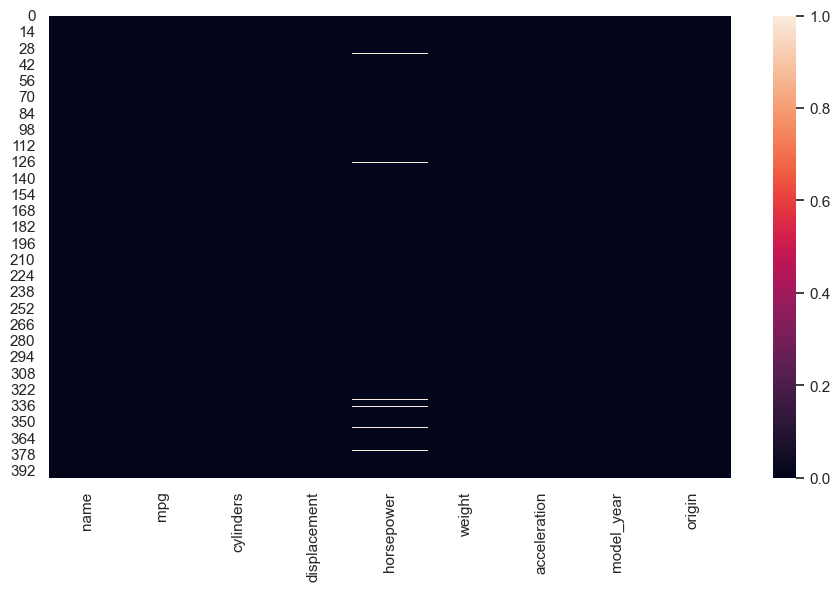

In [61]:
# visualising the missing value
sns.heatmap(df.isna())
plt.show()

In [62]:
## Checking missing value in dataframe
df.isna().sum()*100/len(df)

name            0.000000
mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
dtype: float64

`Insight`

- **From the Heatmap, Missing values are present inside horsepower variable**.
- Only **1.50% missing values are present**. So we are going to fill the missing value with the **mean**.

In [63]:
# treating missing values
# df.horsepower = df.horsepower.fillna(method="ffill").isna().sum()

horsepower_mean = df.horsepower.mean()
df.horsepower = df.horsepower.replace([np.nan, horsepower_mean])

In [64]:
df.isna().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

`Insight`

- After the forward filling of missing value. There are **no missing values present** in dataset.

#### Cleaning the Messy Data

In [65]:
df.replace({'name':{"maxda":"mazda" , 
                        "toyouta":"toyota" ,
                        "vokswagen":"volkswagen" ,
                        "vw":"volkswagen",
                        "mercedes-benz":"mercedes",
                        "chevroelt":"chevrolet",
                        "chevy":"chevrolet"
                        }    },
           
           inplace=True)

In [66]:
# removing these name beacuse the not the proper name of brand
#df = df[~df['name'].isin(['hi', 'capri'])]

In [67]:
df.name.tolist()

['chevrolet chevelle malibu',
 'buick skylark 320',
 'plymouth satellite',
 'amc rebel sst',
 'ford torino',
 'ford galaxie 500',
 'chevrolet impala',
 'plymouth fury iii',
 'pontiac catalina',
 'amc ambassador dpl',
 'dodge challenger se',
 "plymouth 'cuda 340",
 'chevrolet monte carlo',
 'buick estate wagon (sw)',
 'toyota corona mark ii',
 'plymouth duster',
 'amc hornet',
 'ford maverick',
 'datsun pl510',
 'volkswagen 1131 deluxe sedan',
 'peugeot 504',
 'audi 100 ls',
 'saab 99e',
 'bmw 2002',
 'amc gremlin',
 'ford f250',
 'chevy c20',
 'dodge d200',
 'hi 1200d',
 'datsun pl510',
 'chevrolet vega 2300',
 'toyota corona',
 'ford pinto',
 'amc gremlin',
 'plymouth satellite custom',
 'chevrolet chevelle malibu',
 'ford torino 500',
 'amc matador',
 'chevrolet impala',
 'pontiac catalina brougham',
 'ford galaxie 500',
 'plymouth fury iii',
 'dodge monaco (sw)',
 'ford country squire (sw)',
 'pontiac safari (sw)',
 'amc hornet sportabout (sw)',
 'chevrolet vega (sw)',
 'pontiac fir

In [68]:
df.name

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [69]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [70]:
# First Name of Car Company
df.name = df.name.apply(lambda x : x.split(" ")[0])

In [71]:
df.name.head()

0    chevrolet
1        buick
2     plymouth
3          amc
4         ford
Name: name, dtype: object

## 3. Exploratory Data Analysis

In [72]:
sns.set(style="whitegrid", color_codes=True)
sns.set_palette('hsv', 30)

In [73]:
def grouping_features(feature):
    
    # grouping
    car_by_feature = df.groupby('name',as_index=False)[feature].mean().sort_values(
    by=feature,
    ascending=False)
    
    # ploting
    sns.barplot(x=car_by_feature.iloc[0:20, 1], y=car_by_feature.iloc[0:20, 0])
    plt.xlabel(f"{feature}",fontsize=16)
    plt.ylabel('car name', fontsize=16)
    plt.title(f'{feature} by car name', fontsize=18);
    plt.savefig(f"{feature}.png")

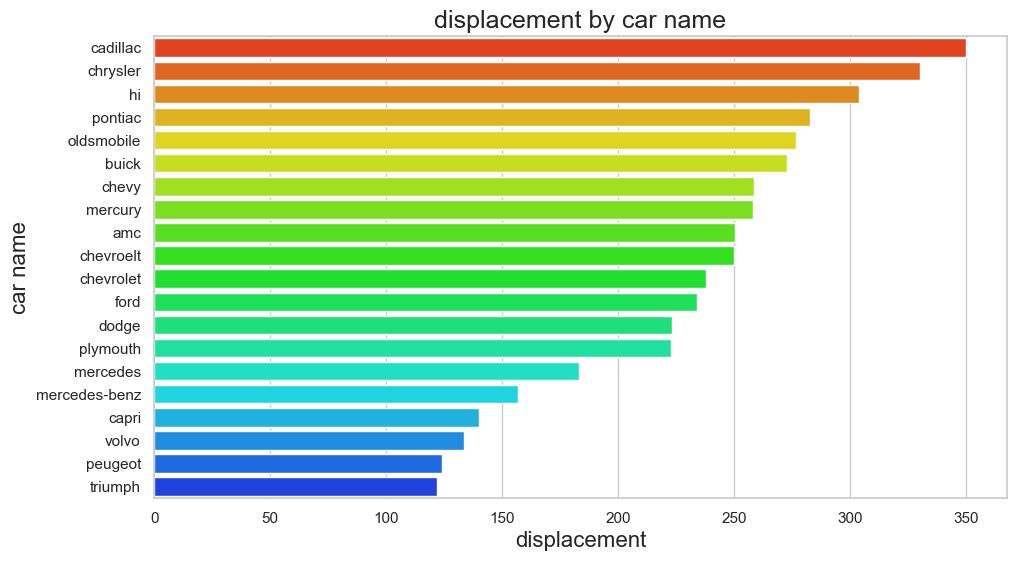

In [74]:
grouping_features('displacement')

`Insight`

**A) Huge gap difference between top 5 car displacement vs others**.

**B)Top 5 car company that have heavy engine displacement in car are**

1. Cadillac
2. chrysler
3. hi
4. pntiac
5. oldsmobile

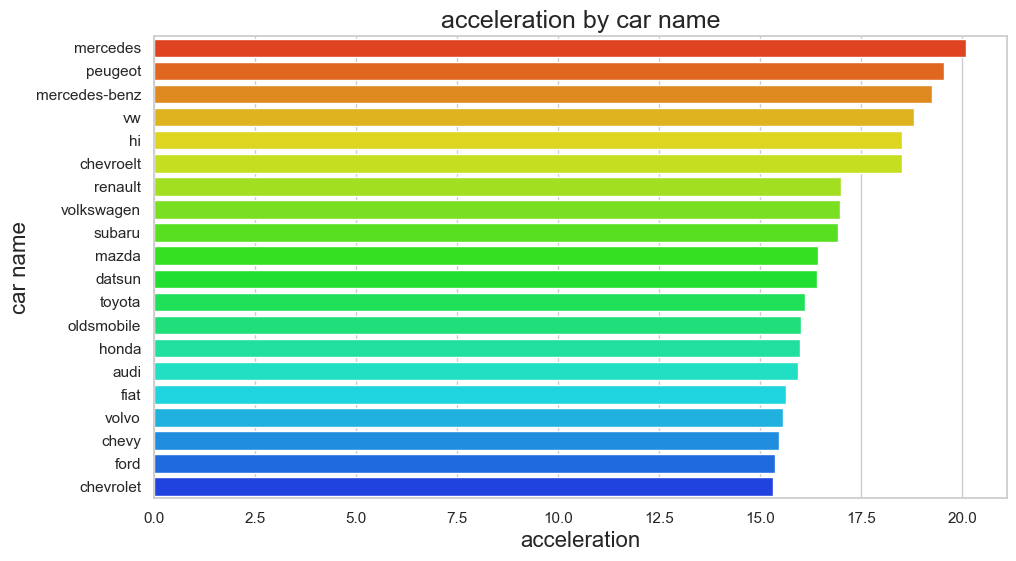

In [75]:
grouping_features('acceleration')

`Insight`

**A) A little bit gap difference between top 5 car acceleration vs others**.

**B)Top 5 car company that have heavy engine displacement in car are**

1. mercedes
2. peugeot
3. mercedes-benz
4. hi
5. vw

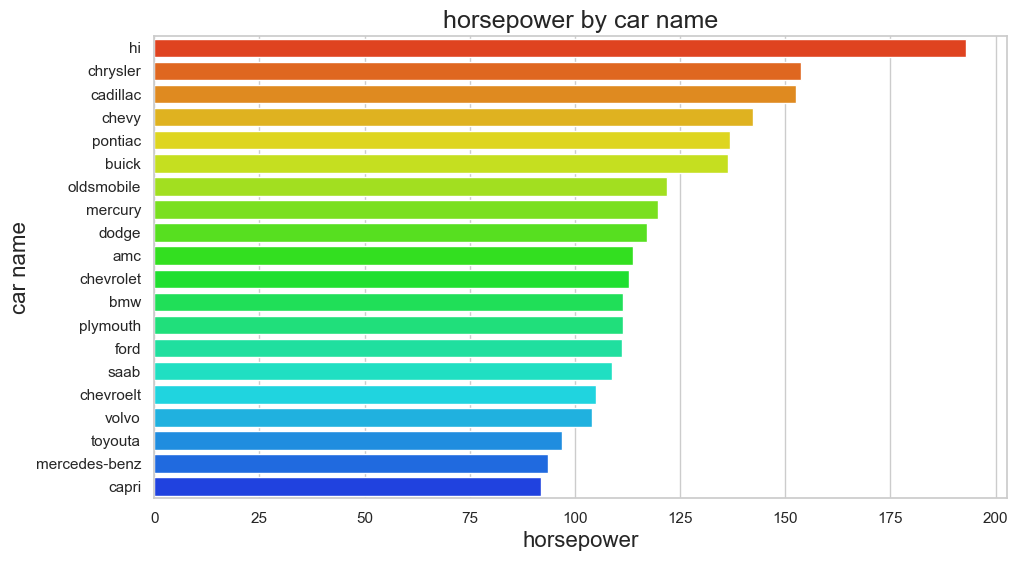

In [76]:
grouping_features('horsepower')

`Insight`

- From the plot, **hi and cadillac** cars have big horsepower they are  **5**. 

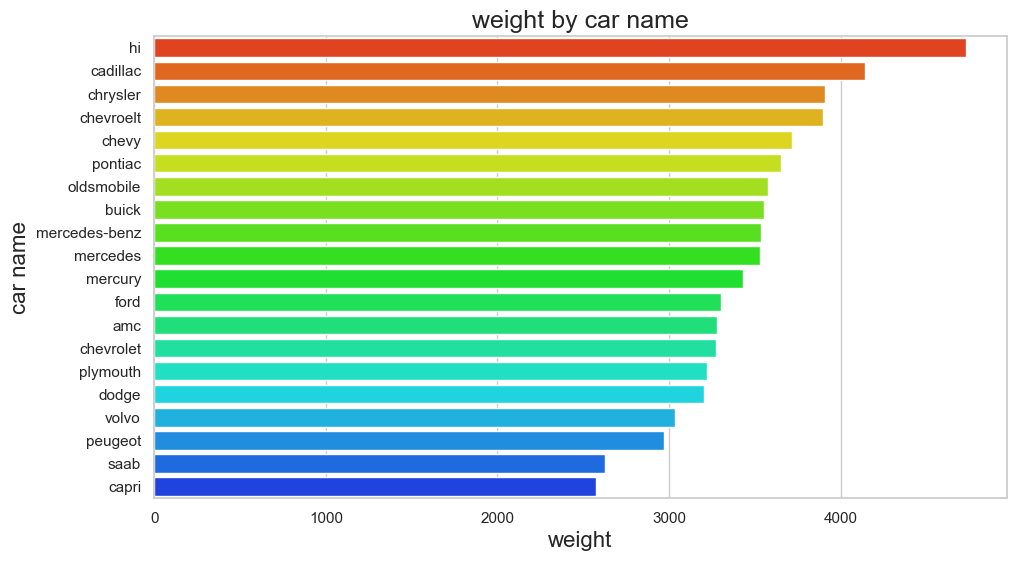

In [77]:
grouping_features('weight')

`Insight`

- **hi** and **cadillac** have **heavy weight** which is **more than 4000**.
- **capri car have very less weight**.

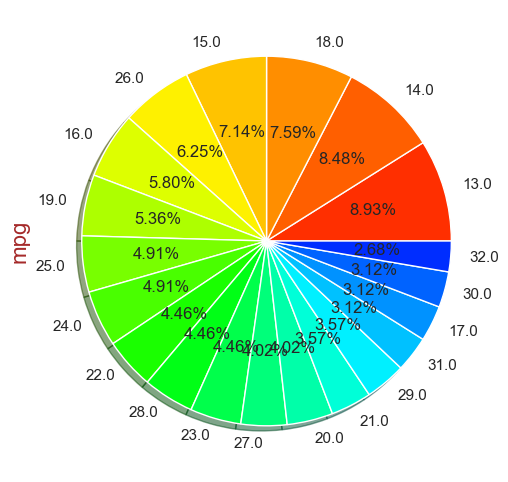

In [78]:
plt.ylabel("mpg", c="brown", size=16)
plt.rcParams["figure.figsize"] = (11,6)
df.mpg.value_counts(ascending=False).head(20).plot.pie(shadow=True, autopct="%0.2f%%")
plt.savefig("pie of mpg contribution.png")
plt.show()


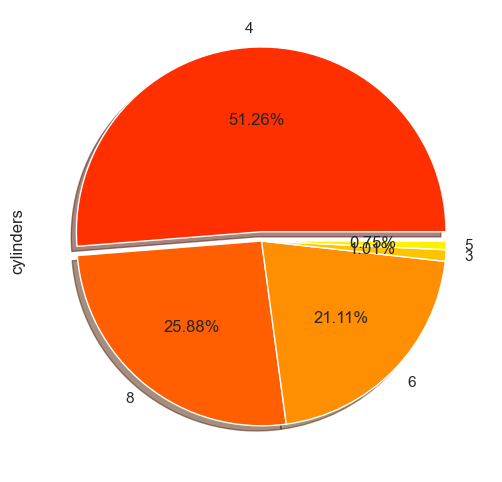

In [79]:
df.cylinders.value_counts(ascending=False).plot.pie(autopct="%0.2f%%",explode=[0.05,0,0,0,0], shadow=True)
plt.savefig("pie of mpg cylinger of cars.png")
plt.show()


`Insight`

- From the pie plot, **4 Cylinders** cars are more than the **sum of 8 and 6 cylinders cars  (47%)**. 
- **4 Cylinders car market is 51%**, which is very huge, after that 8 and 6 cylinder which is 26% and 21%.

In [80]:
df.displacement.value_counts().head()

97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
Name: displacement, dtype: int64

In [81]:
df.displacement.mean()

193.42587939698493

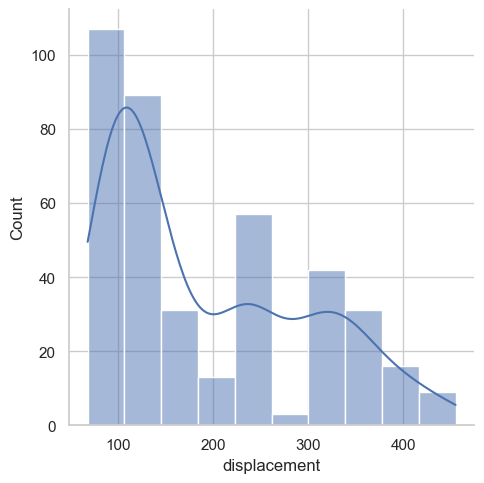

In [82]:
sns.displot(df.displacement, kde=True, color="b")
plt.savefig("histogram of displacement of cars.png")
plt.show()


`Insight`

- From the histogram **Heavy engine displacement cars less demand** compared to less engine displacement cars.

In [83]:
for i in df.columns[1:-1]:
    print(f"********************[ {i}  ]**********************")
    print(df[i].value_counts(ascending=False).head())
    print()
    

********************[ mpg  ]**********************
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
Name: mpg, dtype: int64

********************[ cylinders  ]**********************
4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

********************[ displacement  ]**********************
97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
Name: displacement, dtype: int64

********************[ horsepower  ]**********************
150.0    22
90.0     20
88.0     20
110.0    18
100.0    17
Name: horsepower, dtype: int64

********************[ weight  ]**********************
1985    4
2130    4
2125    3
2945    3
2265    3
Name: weight, dtype: int64

********************[ acceleration  ]**********************
14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
Name: acceleration, dtype: int64

********************[ model_year  ]**********************
73    40
78    36
76    34
82    31
75    30
Name: model_year, dtype: int64



In [84]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

#### Outlier detection

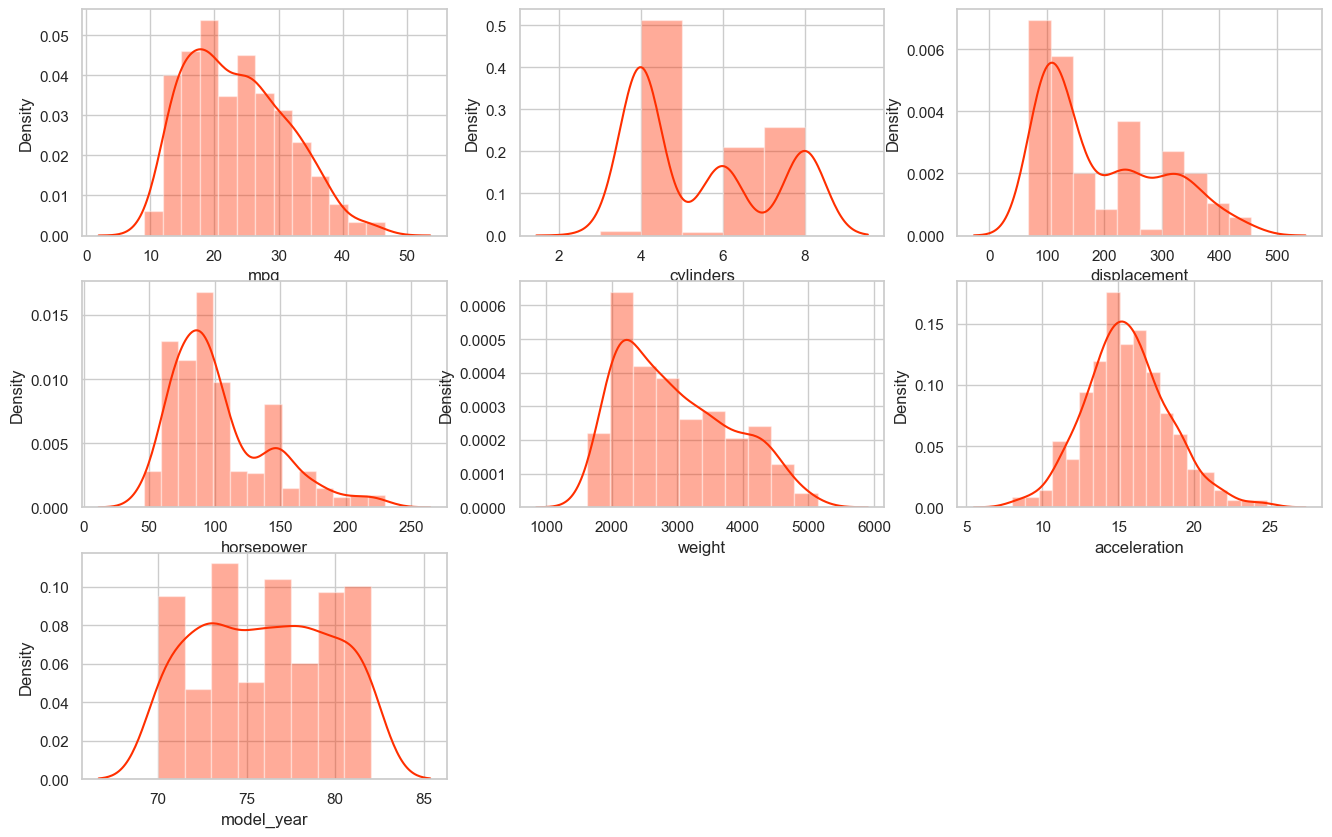

Skewness of [ mpg ] is [ 0.45706634399491913  ]
Skewness of [ cylinders ] is [ 0.5269215453528939  ]
Skewness of [ displacement ] is [ 0.7196451643005952  ]
Skewness of [ horsepower ] is [ 1.1062639699101684  ]
Skewness of [ weight ] is [ 0.5310625125994629  ]
Skewness of [ acceleration ] is [ 0.27877684462588986  ]
Skewness of [ model_year ] is [ 0.01153459401509278  ]


In [85]:
# boxplots of each numerical columns
plt.rcParams["figure.figsize"] = (16,10)
x  = 1
for i in df.columns[1:-1]:
    plt.subplot(3,3,x)
    sns.distplot(df[i])
    x+=1
plt.savefig("pairplot of dataframe.png")
plt.show()

for i in df.columns[1:-1]:
    print(f"Skewness of [ {i} ] is [ {df[i].skew()}  ]")

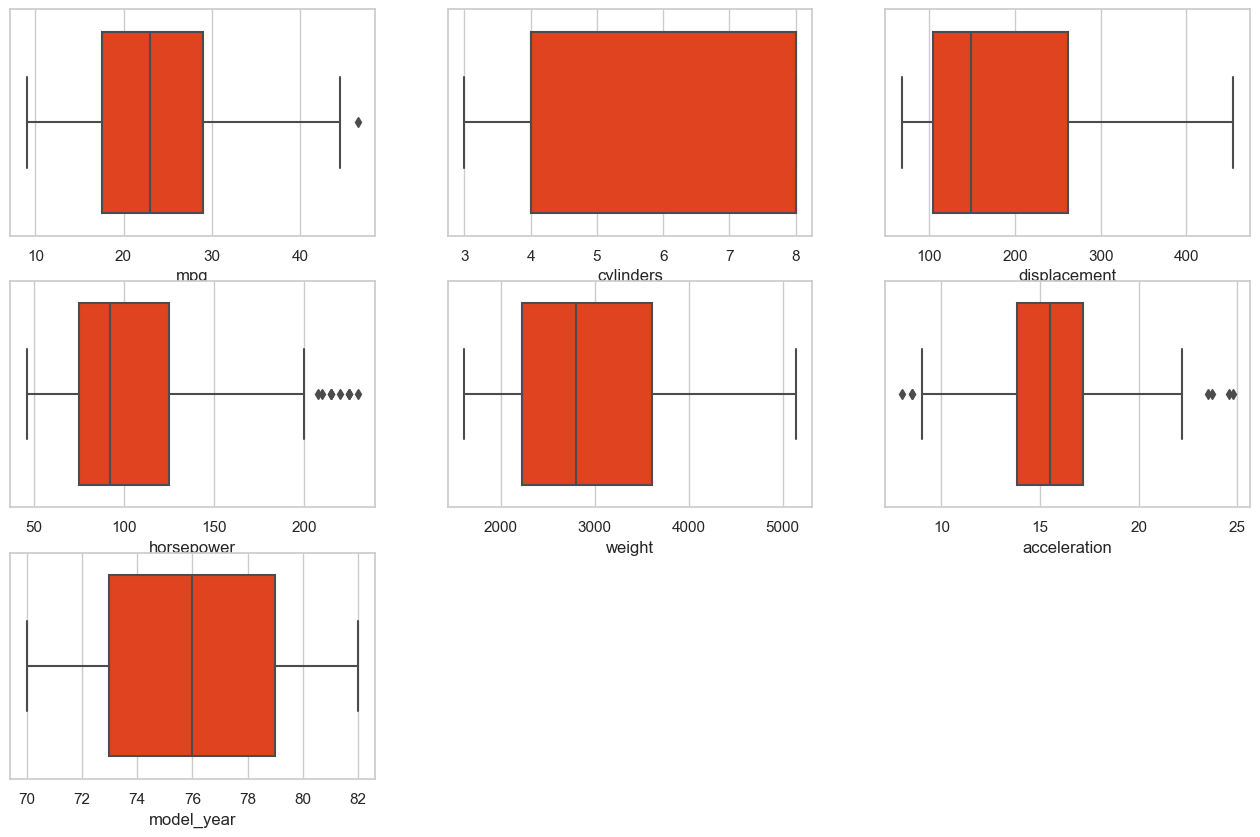

In [86]:
# boxplots of each numerical columns
plt.rcParams["figure.figsize"] = (16,10)
x  = 1
for i in df.columns[1:-1]:
    plt.subplot(3,3,x)
    sns.boxplot(df[i])
    x+=1
plt.savefig("boxplots of dataframe outlier.png")
plt.show()

In [87]:
# using box cox transformation, log transformation
from scipy import stats


df["horsepower"] = np.log(df["horsepower"])
# df["acceleration"] = np.log(df["acceleration"])
df["acceleration"] = np.log(stats.boxcox(df.acceleration)[0]) # boxcox + log tranformation
df["mpg"] = np.log(df["mpg"])

`Insight`

- Outer values are treated using **BOX-COX and Log transformation**.

In [88]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet,2.890372,8,307.0,4.867534,3504,1.700641,70,usa
1,buick,2.708050,8,350.0,5.105945,3693,1.668486,70,usa
2,plymouth,2.890372,8,318.0,5.010635,3436,1.634626,70,usa
3,amc,2.772589,8,304.0,5.010635,3433,1.700641,70,usa
4,ford,2.833213,8,302.0,4.941642,3449,1.598874,70,usa


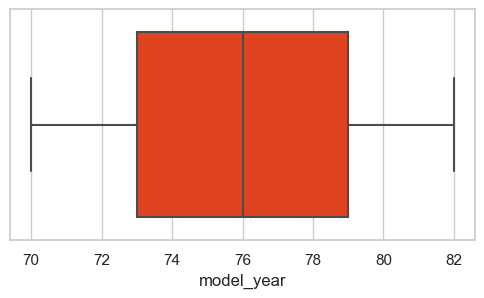

In [89]:
plt.rcParams["figure.figsize"] = (6,3)

sns.boxplot(df.model_year)
plt.savefig("boxplot of model_year.png")
plt.show()


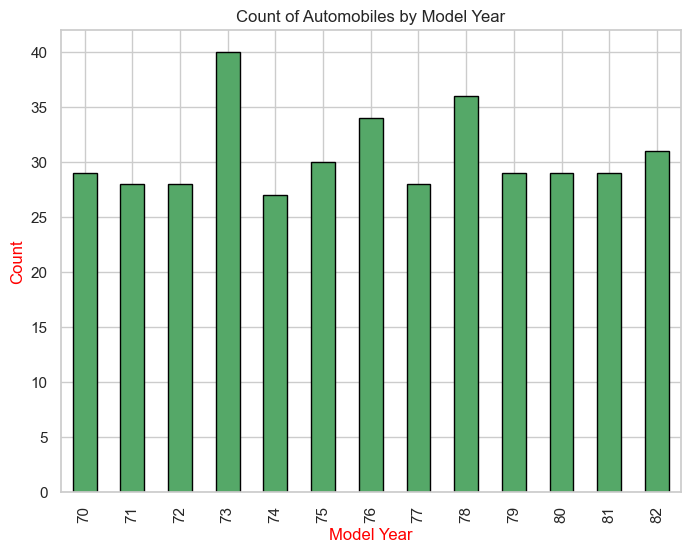

In [90]:
# Bar plot of Model Year: This plot will show the count of automobiles for each year of manufacture.
plt.figure(figsize=(8, 6))
df['model_year'].value_counts().sort_index().plot(kind='bar', edgecolor='black', fc="g")
plt.xlabel('Model Year', c="red")
plt.ylabel('Count', c="red")
plt.title('Count of Automobiles by Model Year')
plt.savefig("barplot of automobile by model year.png")
plt.show()


`Insight`

- From the boxplot, mean of the Car's Year is **76**.
- Mostly cars year come from the **1970** than **1980**. Which mean these cars were built in this year. These are old cars.

In [91]:
car_origin_count = df.groupby(['name','origin'], as_index=False).size().sort_values(by='size', ascending=False)
car_origin_count

,name,origin,size
13,ford,usa,51
7,chevrolet,usa,43
25,plymouth,usa,31
0,amc,usa,28
11,dodge,usa,28
30,toyota,japan,25
10,datsun,japan,23
3,buick,usa,17
26,pontiac,usa,16
34,volkswagen,europe,15


In [92]:
# Calculate the count for each origin
origin_count = df.groupby('origin').size().sort_values()

# Rename the 'size' column to a different name
origin_count = origin_count.rename('count').reset_index()
origin_count

,origin,count
0,europe,70
1,japan,79
2,usa,249


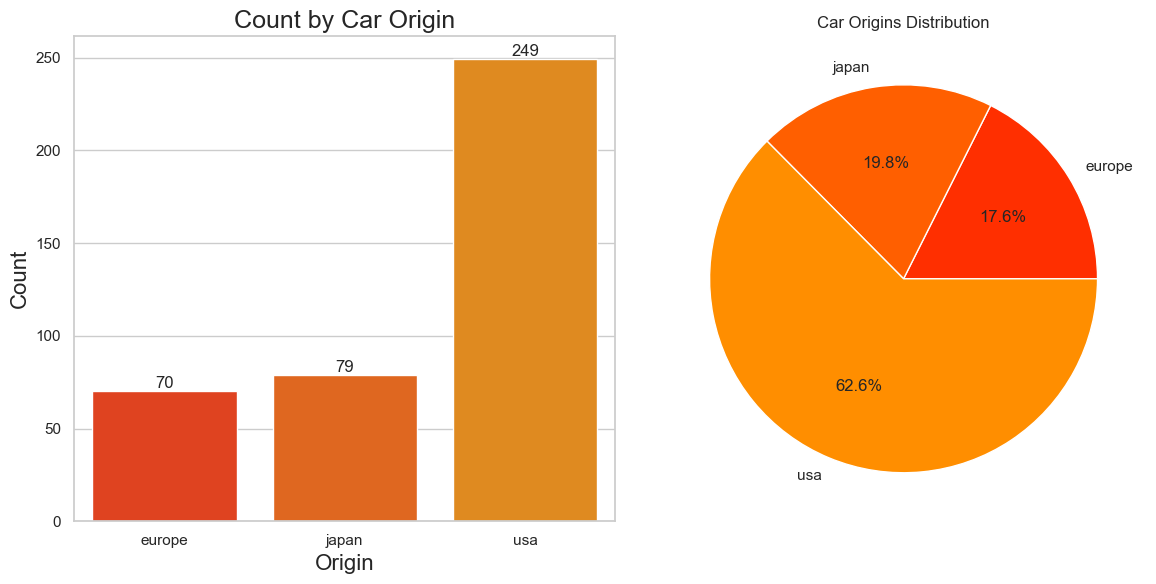

In [93]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the count bar plot
sns.barplot(x='origin', y='count', data=origin_count, ax=ax1)
ax1.set_xlabel('Origin', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.set_title('Count by Car Origin', fontsize=18)
ax1.bar_label(ax1.containers[0])

# Plot the pie chart
ax2.pie(origin_count['count'], labels=origin_count['origin'], autopct='%1.1f%%')
ax2.set_title('Car Origins Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()
fig.savefig("distribution of cars by origin.png")

`Insight`

- The most car's origin are **USA**. Which share is approximately **63%**. Very huge gap difference between **USA-Japan** and **USA-Europe**.
- **Japan** and **Europe** have **equal ratio of cars**.

#### Anlaysis of differnt variable with  (mpg)

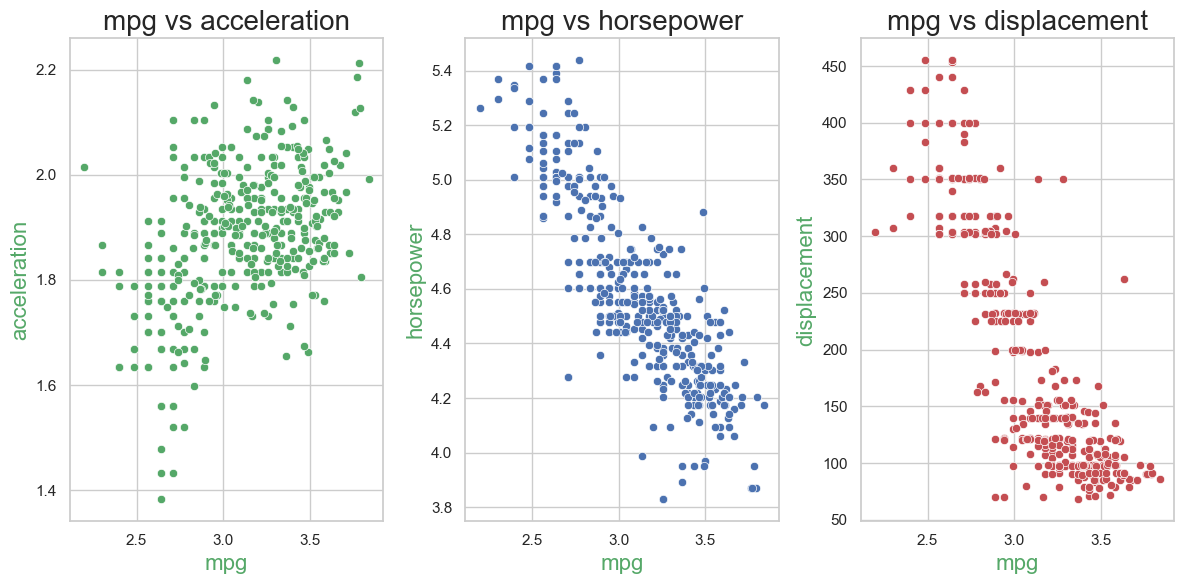

In [94]:
 # sns.barplot(x=, y=,data=df)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

# plot 1 
sns.scatterplot(     data=df, x="mpg", y="acceleration",ax=ax1, color="g")
ax1.set_title("mpg vs acceleration", size=20)
ax1.set_xlabel("mpg", c="g", size=16)
ax1.set_ylabel("acceleration", c="g", size=16)

# plot 2
sns.scatterplot(      data=df, x="mpg", y="horsepower",ax=ax2,color="b")
ax2.set_title("mpg vs horsepower", size=20)
ax2.set_xlabel("mpg", c="g", size=16)
ax2.set_ylabel("horsepower", c="g", size=16)


# plot 3
sns.scatterplot( data=df, x="mpg", y="displacement",ax=ax3,  color="r")
ax3.set_title("mpg vs displacement", size=20)
ax3.set_xlabel("mpg", c="g", size=16)
ax3.set_ylabel("displacement", c="g", size=16)

# Adjust spacing between subplots
plt.tight_layout()

# Display the combined plot
fig.savefig("distribution of variables with mpg.png")
plt.show()


In [95]:
print("Average weight of car is : ", df.weight.mean())

Average weight of car is :  2970.424623115578


`Insight` 

- Finding relationship between **weight**, **horsepower** and **displacement**. From the graph, we can say that the **More cars that have low displacement** than **high displacement**.
- Some cars have **high displacement with high horsepower and also it has heavy weight** approximately **4000-5000**.
- Average weight of car is **2970.424623115578**.

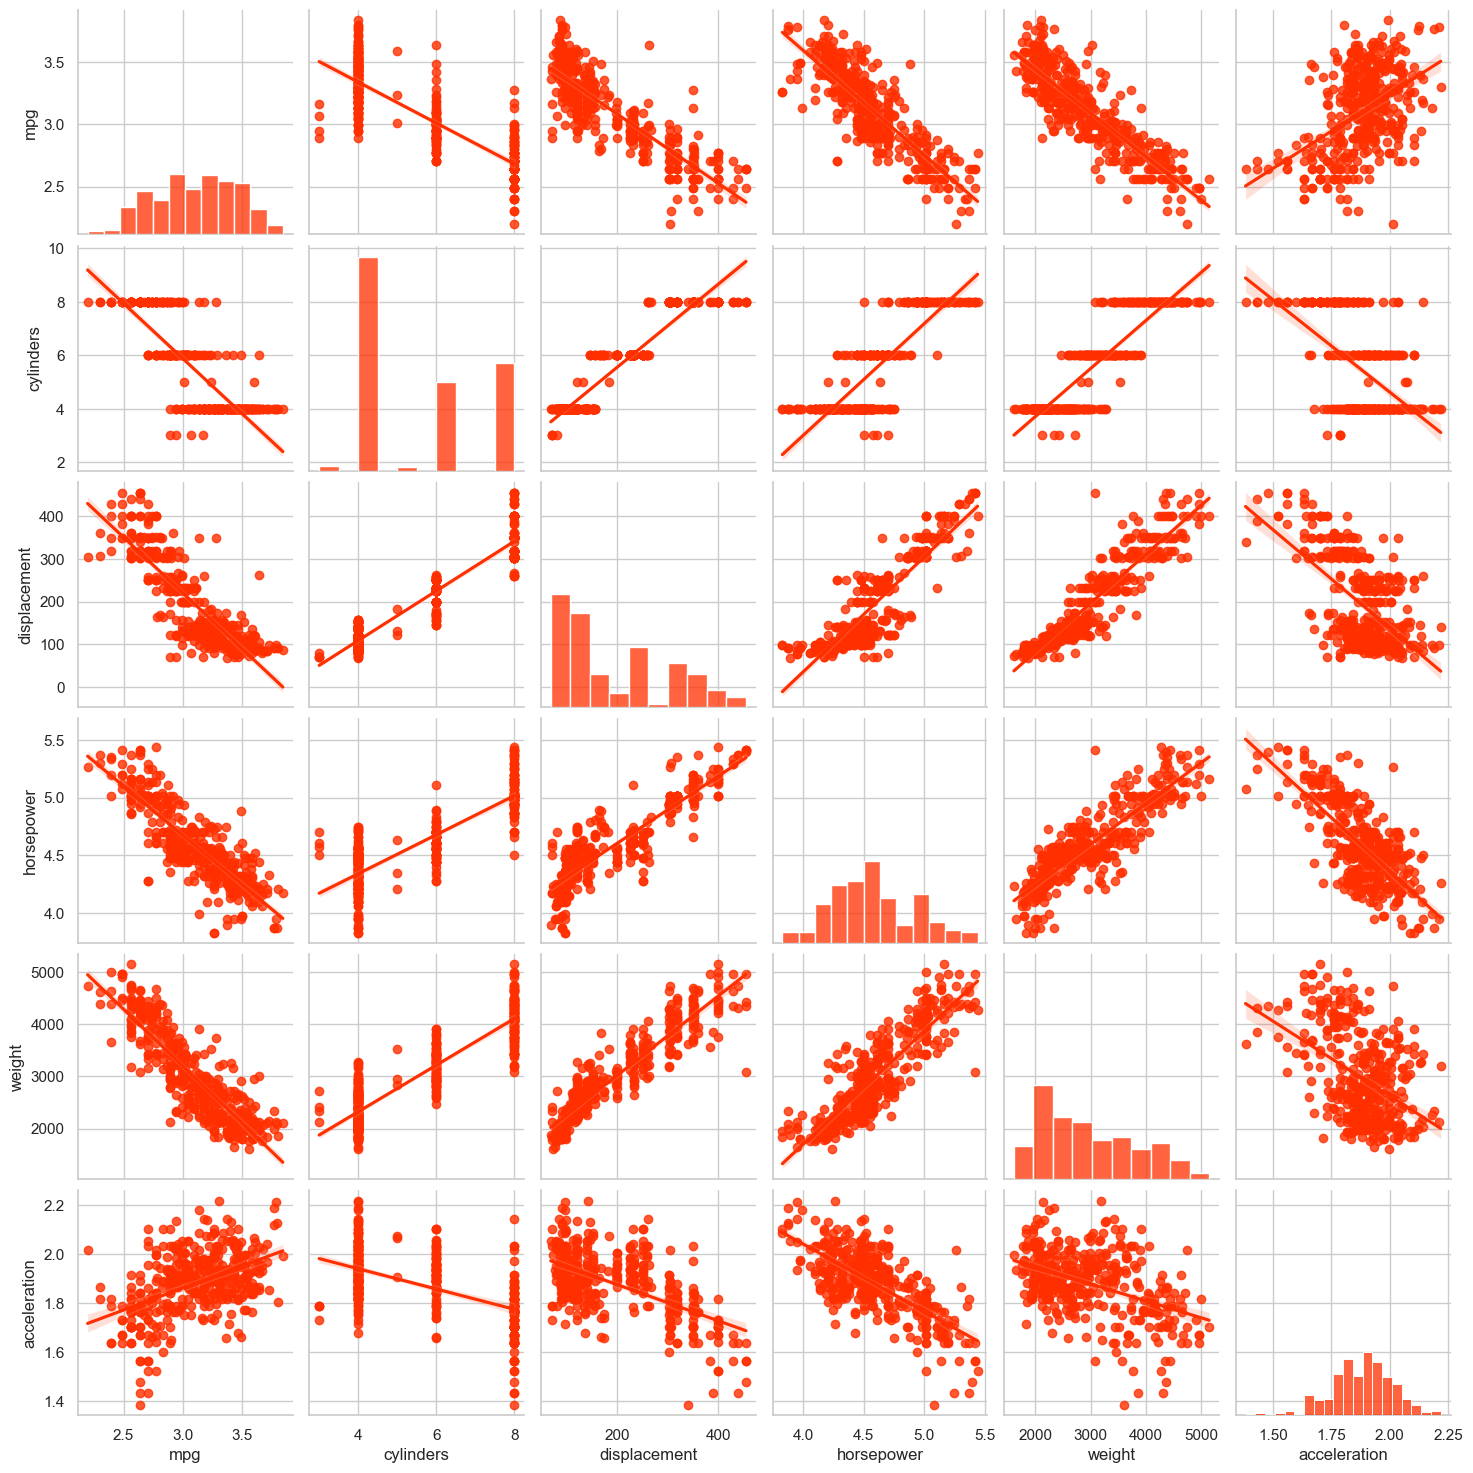

In [96]:
sns.pairplot(data=df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']], kind='reg')
plt.show()

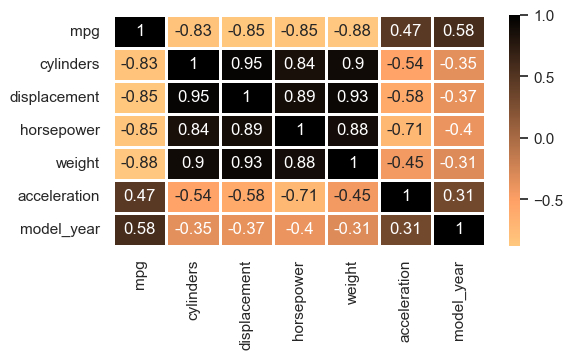

In [97]:
# heatmap of dataset
sns.heatmap(df.corr(), annot=True, cmap="copper_r",linewidth=1)

plt.savefig("heatmap of cars dataset.png")
plt.show()

`Insight`

- column **mpg** is directly associated with **weight**, **horsepower**, **acceleration**,**displacement**. It means they are positively correlated with **mpg**.

## 5. Report/Conclusion

From this car dataset, These are the some interesting pattern and trend.

- The engine displacement of car **Cadillac, Chrylser** and **Hi** have **more than others**. Which is **300+ ,**  **Trumph** car have **very less engine displacement** it come at the last. The **average car engine dispalcement is 193**.


- The **acceleration of cars are same** which lies between **1.50 to 2.10**. There are no huge difference in acceleration of cars.


- The Horsepower of **Hi** and **Cadillac** are more **5**.


- The weight of **capri** car have very less which is approximately **2600 kg**. In **Hi, Cadillac** cars have **high weight more than 4000kg**. 


- **More than 50% of cars have 4 cylinders**. After that **8 cylinders and 6 cylinder** comes.


- column **mpg** is directly associated with **weight**, **horsepower**, **acceleration**,**displacement**.They are **positively correleated**. It means 


    a) if we increase/decrease **weight**, **mpg will also increase/decrease**
    b) if we increase/decrease **horsepowet**, **mpg will also increase/decrease**
    c) if we increase/decrease **accelearation**, **mpg will also increase/decrease**
    d) if we increase/decrease **displacement**, **mpg will also increase/decrease**

# Thanks for Visiting.